In [2]:
#Import needed modules
import requests
import collections

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as lite

from datetime import datetime
from dateutil.parser import parse

%matplotlib inline

The most active station is station id 490 at 8 Ave & W 33 St (latitude: 40.751551 longitude: -73.993934)

With 281 bicycles coming and going in the hour between 2016-07-22 17:55:45 and 2016-07-22 19:00:58


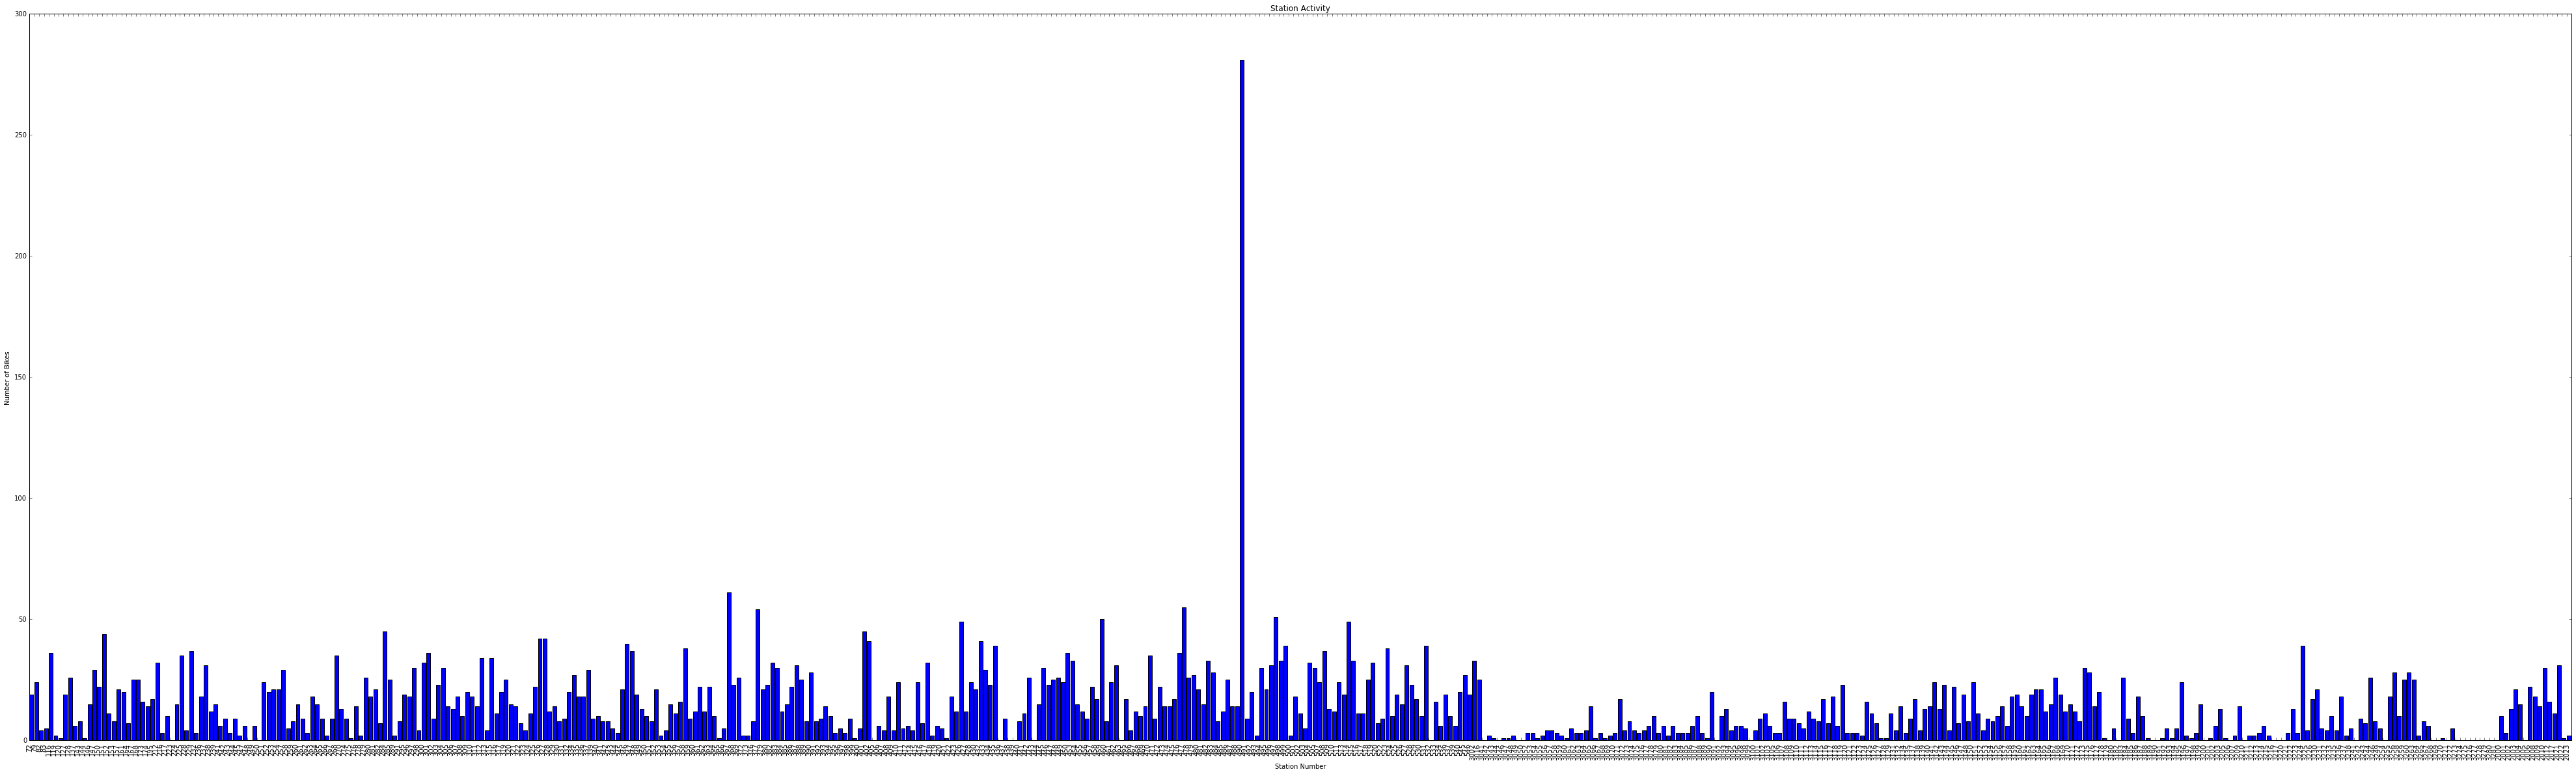

In [4]:
'''
Pull CitiBike usage data and identify busiest station
'''
con = lite.connect('citibike.db')
cur = con.cursor()

#Pull bike data from database
bikedata = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY execution_time",con,index_col='execution_time')

#Find station activity over an hour
hourdelta=collections.defaultdict(int)
for key, val in bikedata.iteritems():      
    hourdelta[int(key.replace("_",""))] = sum([abs(val[i] - val[i - 1]) for i in range(1,len(val))])

#Pull specific station data from database
data = cur.execute("SELECT id, stationname, latitude, longitude FROM citibike_reference WHERE id = ?", 
                 (max(hourdelta, key=hourdelta.get), )).fetchone()

print('The most active station is station id %s at %s (latitude: %s longitude: %s)\n' % data)
print('With %d bicycles coming and going in the hour between %s and %s' 
      % (hourdelta[data[0]],datetime.strptime(bikedata.index[0],"%Y%m%d_%H%M%S"),
         datetime.strptime(bikedata.index[-1],"%Y%m%d_%H%M%S")))

num_stations = len(hourdelta.values()) + 1
plt.figure(figsize = (70, 20))
plt.bar(range(1, num_stations), hourdelta.values());
plt.title('Station Activity');
plt.xlabel('Station Number');
plt.ylabel('Number of Bikes');
plt.xticks(range(1, num_stations), hourdelta.keys(), rotation = 90);
plt.xlim([1, num_stations])
plt.savefig('CitiBike_Usage', dpi = 300)